# **Task 1**




# **Import** **necessary** **libraries**

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from google.colab import files
import re
pd.set_option('display.show_dimensions', False)


# **Retrieve** **the** **description**


In [4]:
def get_description(url:str)->str:
    headers = {
      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
      'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
      'Accept-Language': 'en-US,en;q=0.5',
      'Referer': 'https://www.google.com/',
      'DNT': '1',  # Do Not Track
      'Connection': 'keep-alive'
     }
    response=requests.get(url,headers=headers)
    soup=BeautifulSoup(response.content,'html.parser')
    Description=soup.find('span',class_='sc-bf30a0e-0 iOCbqI').text.strip()
    return Description


# **Retrieve** **The** **response** **and** **parse** **it**



In [5]:
def extract_movie_details(url:str)->pd.DataFrame:
  base_url='https://www.imdb.com'
  url=url
  headers = {
      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
      'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
      'Accept-Language': 'en-US,en;q=0.5',
      'Referer': 'https://www.google.com/',
      'DNT': '1',  # Do Not Track
      'Connection': 'keep-alive'
  }
  response=requests.get(url,headers=headers)
  soup=BeautifulSoup(response.content,'html.parser')

  outer_layer=soup.find('ul',class_="ipc-metadata-list ipc-metadata-list--dividers-between sc-2b8fdbce-0 emPbxy compact-list-view ipc-metadata-list--base")
  inner_layer=outer_layer.find_all('li',class_='ipc-metadata-list-summary-item')
  TheDataFrame={'Rank':[],"Title":[],'Year of Release':[],'Duration':[],'IMDb Rating':[],'Description':[]}

  # Iterate through each movie element in the list
  for movie in inner_layer:
      metadata_items = movie.find('h3',class_='ipc-title__text ipc-title__text--reduced')
      Year_duration_rating=movie.find_all('span',class_='sc-29531a57-8 cxFOWT cli-title-metadata-item')
      rating=movie.find('span',class_='ipc-rating-star--rating').text.strip()
      portion=[item.text.strip() for item in Year_duration_rating]
      result=re.search('(\d+)\.(.+)',string=metadata_items.text.strip())# extract the text and the rank
      link=base_url+movie.find('a',class_='ipc-title-link-wrapper').get('href')
      description=get_description(link)
      TheDataFrame['IMDb Rating'].append(rating)
      TheDataFrame['Title'].append(result.group(2).strip())
      TheDataFrame['Rank'].append((result.group(1)))
      TheDataFrame['Year of Release'].append(portion[0])
      TheDataFrame['Duration'].append(portion[1])
      TheDataFrame['Description'].append(description)
  return pd.DataFrame(TheDataFrame)

url='https://www.imdb.com/chart/top/'
TheDataFrame=extract_movie_details(url)
TheDataFrame


,Rank,Title,Year of Release,Duration,IMDb Rating,Description
0,1,The Shawshank Redemption,1994,2h 22m,9.3,A banker convicted of uxoricide forms a friend...
1,2,The Godfather,1972,2h 55m,9.2,The aging patriarch of an organized crime dyna...
2,3,The Dark Knight,2008,2h 32m,9.0,When a menace known as the Joker wreaks havoc ...
3,4,The Godfather Part II,1974,3h 22m,9.0,The early life and career of Vito Corleone in ...
4,5,12 Angry Men,1957,1h 36m,9.0,The jury in a New York City murder trial is fr...
5,6,The Lord of the Rings: The Return of the King,2003,3h 21m,9.0,Gandalf and Aragorn lead the World of Men agai...
6,7,Schindler's List,1993,3h 15m,9.0,"In German-occupied Poland during World War II,..."
7,8,Pulp Fiction,1994,2h 34m,8.8,"The lives of two mob hitmen, a boxer, a gangst..."
8,9,The Lord of the Rings: The Fellowship of the Ring,2001,2h 58m,8.9,A meek Hobbit from the Shire and eight compani...
9,10,"The Good, the Bad and the Ugly",1966,2h 58m,8.8,A bounty-hunting scam joins two men in an unea...


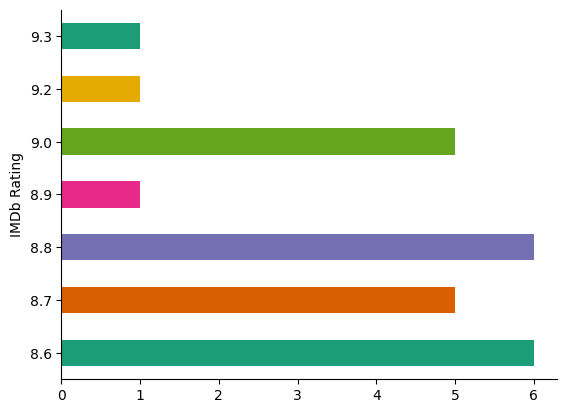

In [6]:
# @title IMDb Rating

from matplotlib import pyplot as plt
import seaborn as sns
TheDataFrame.groupby('IMDb Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Saving the CSV file


In [7]:
TheDataFrame.to_csv('Top25_movie_imdb.csv',index=False)
files.download('Top25_movie_imdb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Task 2**


# **Import** **necessary** **libraries**


In [8]:
!pip install python-Levenshtein
!pip install gradio
from  Levenshtein import distance
import pandas as pd
import gradio as gr

df = pd.read_csv('Top25_movie_imdb.csv')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.1 MB/s eta 0:00:00


# **Format** **function**

In [9]:
def format_function(result)->str:# formats the pd.series
    response= f"""
    🎬 Title: {result['Title']}
    📅 Year: {result['Year of Release']}
    ⏱️ Duration: {result['Duration']}
    ⭐ Rating: {result['IMDb Rating']}
    📖 Description: {result['Description']}
    """
    return response

# **Auto Correct and retrieve the movie function**




In [43]:
def find_the_closet_movie(user_input:str,threshold:float)->str:

  df=pd.read_csv('Top25_movie_imdb.csv')
  titles= df['Title'].tolist()

  if not user_input.strip():
    return '','Please enter a movie name'
  exact_match=df[df['Title'].str.strip().str.lower() == user_input.strip().lower()]

  if not exact_match.empty:
    return exact_match.iloc[0]['Title'],format_function(exact_match.iloc[0])

  else:
    valid_matches=[]
    for title in titles:
      dist= distance(title.lower(),user_input.lower())
      similarity=1-(dist/max(len(title),len(user_input)))
      if similarity>=threshold:
        valid_matches.append((similarity,title))

    if not valid_matches:
      return '',"no movies found"

    best_match = max(valid_matches, key=lambda x: x[0])
    result = df[df['Title'].str.strip().str.lower() == best_match[1].strip().lower()].iloc[0]

    return result['Title'],format_function(result)
  return '',''

# **Task 3**



# **Import** **necessary** **libraries**

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# **Recommendation** **function**

In [44]:

def Recommendation(movie_title):

    if movie_title not in df['Title'].tolist():
        return 'Movie not found'

    movie_index = df[df['Title'] == movie_title].index[0]
    Vectorizer = TfidfVectorizer(stop_words='english')
    x_array = Vectorizer.fit_transform(df['Description'])
    similarity = cosine_similarity(x_array[movie_index].reshape(1, -1), x_array)
    sorted_ones = sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x: x[1])
    top_five = sorted_ones[1:6]
    indices = [tupl[0] for tupl in top_five]
    recommended_movies = df.iloc[indices]

    result = ""
    for _ , row in recommended_movies.iterrows():
        result += format_function(row) + "\n"
    return result


# **Combined** **function**

In [49]:
#Function that invokes both functions from task 1 and 2

def combine_functions(user_input:str,threshold: float = 0.6):

    movie_title,movie_info = find_the_closet_movie(user_input,threshold)


    if "no movies found" in movie_info.lower() or "Please enter a movie name" in movie_info.lower():
        return movie_info

    recommendations = Recommendation(movie_title)

    return f"Movie Found:\n{movie_info}\n\nRecommended Movies:\n{recommendations}"


# **Interface**

In [50]:
import gradio as gr

interface = gr.Interface(
    fn=combine_functions,
    inputs=[
        gr.Textbox(label="Enter movie title", placeholder="Type movie name here..."),
        gr.Slider(minimum=0.1, maximum=1.0, step=0.1, value=0.6, label="Similarity Threshold")
    ],
    outputs=gr.Textbox(label="Movie Information & Recommendations"),
    title="Movie Search & Recommendation System",
    description="Search for movies from IMDB Top 25 list with adjustable spelling correction threshold",
    examples=[
        ["Godfther", 0.5],
        ["Shawshank", 0.7],
        ["Pulp Ficton", 0.6]
    ],
    theme=gr.themes.Soft()
)

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d73b4e73311e753152.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
